A partir de los datos de iris:

Ejercicio 1:

- Carga los datos originales
- Utiliza PCA para reducir la dimensionalidad de los datos. No reemplaces X con el resultado, crea una nueva X_pca. Utiliza PCA(2) y otra con PCA(3)
- Utiliza Kmeans para agrupar y predecir las clases de los nuevos datos.
- Compara los resultados para PCA(2) y PCA(3) con las clases originales (y_real).
- ¿Es mejor PCA(2) o PCA(3)?

Ejercicio 2: 

- Repite el proceso con T-SNE y DBSCAN. ¿Cuál da mejores resultados?


In [27]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd

import random
import numpy as np 

import warnings
warnings.filterwarnings("ignore")

In [6]:
from sklearn.model_selection import train_test_split
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

* Utiliza PCA para reducir la dimensionalidad de los datos. No reemplaces X con el resultado, crea una nueva X_pca.

In [9]:
# creamos una funcion para reducir la dimensionalidad de mis datos

def pca_func(n_components, X):
    pca = PCA(n_components , random_state= 42)
    pca.fit(X)
    X_pca = pca.transform(X)

    #2D
    if n_components<3:
        plt.scatter(X_pca[:, 0], X_pca[:, 1], c= y)

    else: #3D
        fig = pyplot.figure()
        ax = Axes3D(fig)
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c= y)
        pyplot.show()

    print(pca.explained_variance_ratio_)

    return X_pca



* Utiliza PCA(2) y otra con PCA(3)

[0.92461872 0.05306648]


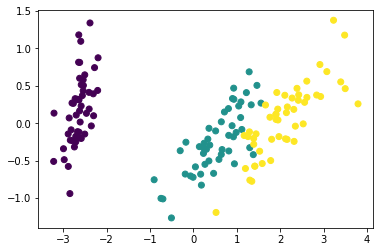

In [13]:
pca_2 = pca_func(2,X)

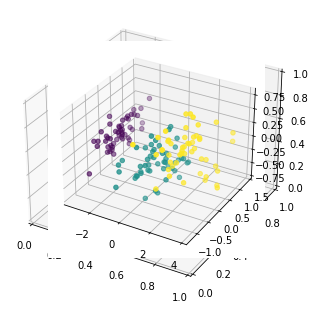

[0.92461872 0.05306648 0.01710261]


In [14]:
pca_3 = pca_func(3,X)

* Utiliza Kmeans para agrupar y predecir las clases de los nuevos datos.

In [22]:
def kmeans_func(n_clusters, X):
    kmeans = KMeans(n_clusters, random_state=42).fit(X)
    predict = kmeans.predict(X)
    
    return predict

In [24]:
# para pca_2

pred_2 = kmeans_func(n_clusters= 2, X= pca_2)
pred_2

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [25]:
# para pca_3

pred_3 = kmeans_func(n_clusters= 3, X= pca_3)
pred_3

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

 * Compara los resultados para PCA(2) y PCA(3) con las clases originales (y_real).

In [30]:
X_pca = pd.DataFrame(X)
X_pca["y_real"] = y
X_pca["PCA(2)   Pred"] = pred_2
X_pca["PCA(3)   Pred"] = pred_3

X_pca

,0,1,2,3,y_real,PCA(2) Pred,PCA(3) Pred
0,5.1,3.5,1.4,0.2,0,1,1
1,4.9,3.0,1.4,0.2,0,1,1
2,4.7,3.2,1.3,0.2,0,1,1
3,4.6,3.1,1.5,0.2,0,1,1
4,5.0,3.6,1.4,0.2,0,1,1
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,0,2
146,6.3,2.5,5.0,1.9,2,0,0
147,6.5,3.0,5.2,2.0,2,0,2
148,6.2,3.4,5.4,2.3,2,0,2


* ¿Es mejor PCA(2) o PCA(3)?

In [32]:
comparacion_pca_2 = X_pca["y_real"] == X_pca["PCA(2)   Pred"]
comparacion_pca_3 = X_pca["y_real"] == X_pca["PCA(3)   Pred"]

In [34]:
print("valores correctamente predecidos con PCA(2) igual a:",np.count_nonzero(comparacion_pca_2))
print("valores correctamente predecidos con PCA(3) igual a:",np.count_nonzero(comparacion_pca_3))

valores correctamente predecidos con PCA(2) igual a: 3
valores correctamente predecidos con PCA(3) igual a: 36


In [39]:
from sklearn import metrics
print("SCORES")
print( "CON PCA(2) ACCURACY: ", metrics.accuracy_score(y, pred_2))
print( "CON PCA(3) ACCURACY: ", metrics.accuracy_score(y, pred_3))

SCORES
CON PCA(2) ACCURACY:  0.02
CON PCA(3) ACCURACY:  0.24


### A NUESTRO MODELO LE PERJUDICA EL APRENDIZAJE LA REDUCCION DE SUS DATOS A 2 DIMENSIONES

#### Repite el proceso con T-SNE y DBSCAN. ¿Cuál da mejores resultados?

In [46]:
#funcion para T-sne

from sklearn.manifold import TSNE
import plotly.express as px

def tsne_func(n_components, X):
    X_embedded = TSNE(n_components).fit_transform(X)
    df2= pd.DataFrame(data=X_embedded)

    if n_components < 3:
        plt.scatter(df2[0], df2[1], c=iris.target)
        
    else:
        fig = px.scatter_3d(x=df2[0], y=df2[1], z=df2[2], color=y)
        fig.show()

    return X_embedded




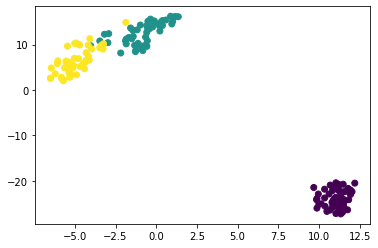

In [44]:
#T-SNE(2)

pred_t2 = tsne_func(n_components = 2, X = X)

In [47]:
pred_t3 = tsne_func(n_components = 3, X = X)

In [49]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [50]:
#creamos funcion para DB_scan

def dbscan_func(to_predict, eps, min_samples):

    X = StandardScaler().fit_transform(to_predict)

    db = DBSCAN(eps, min_samples).fit(X)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)  

    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_
    return labels

In [51]:
dbscan_2 = dbscan_func(to_predict= pred_t2, eps= 2, min_samples=4)
dbscan_2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [52]:
dbscan_3 = dbscan_func(to_predict= pred_t3, eps= 2, min_samples=4)
dbscan_3

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [55]:
X_dbscan = pd.DataFrame(X)
X_dbscan["y_real"] = y
X_dbscan["DBSCAN(2) Pred"] = dbscan_2
X_dbscan["DBSCAN(3) Pred"] = dbscan_3

X_dbscan

,0,1,2,3,y_real,DBSCAN(2) Pred,DBSCAN(3) Pred
0,5.1,3.5,1.4,0.2,0,0,0
1,4.9,3.0,1.4,0.2,0,0,0
2,4.7,3.2,1.3,0.2,0,0,0
3,4.6,3.1,1.5,0.2,0,0,0
4,5.0,3.6,1.4,0.2,0,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,1,0
146,6.3,2.5,5.0,1.9,2,1,0
147,6.5,3.0,5.2,2.0,2,1,0
148,6.2,3.4,5.4,2.3,2,1,0


In [57]:
comparacion_dbscan_2 = X_dbscan["y_real"] == X_dbscan["DBSCAN(2) Pred"]
comparacion_dbscan_3 = X_dbscan["y_real"] == X_dbscan["DBSCAN(3) Pred"]

In [58]:
print("valores correctamente predecidos con DBSCAN(2) igual a:",np.count_nonzero(comparacion_dbscan_2))
print("valores correctamente predecidos con DBSCAN(3) igual a:",np.count_nonzero(comparacion_dbscan_3))

valores correctamente predecidos con DBSCAN(2) igual a: 100
valores correctamente predecidos con DBSCAN(3) igual a: 50


In [59]:
print("SCORES")
print( "CON DBSCAN(2) ACCURACY: ", metrics.accuracy_score(y, dbscan_2))
print( "CON DBSCAN(3) ACCURACY: ", metrics.accuracy_score(y, dbscan_3))

SCORES
CON DBSCAN(2) ACCURACY:  0.6666666666666666
CON DBSCAN(3) ACCURACY:  0.3333333333333333


#### EN ESTE CASO TENEMOS MEJORES RESULTADOS AL PREDECIR LOS RESULTADOS CON DBSCAN (2), ES POSIBLE QUE PERJUDIQUE AL MODELO LA PERDIDA DE            INFORMACION A PARTIR DE LA REDUCCION CON TSNE(3)